In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# IMPORTANT PAGE 53 OF RAND HRS LONGITUDIANL FILE DOCUMENTATION IS THE CODE BOOK
langadata = pd.read_stata("data/cogfinalimp_9520wide.dta")
longdata = pd.read_stata("data/randhrs1992_2022v1.dta")

In [4]:
langadata.shape
#print(langadata['pn'].value_counts())
#print(langadata['hhid'].value_counts())
print(langadata.head(10))
#langadata['proxy2018'].dtype

     hhid   pn  imrc_imp2018  dlrc_imp2018  ser7_imp2018  bwc20_imp2018  \
0  000002  010           NaN           NaN           NaN            NaN   
1  000003  010           NaN           NaN           NaN            NaN   
2  000003  020           NaN           NaN           NaN            NaN   
3  010001  010           NaN           NaN           NaN            NaN   
4  010003  020           NaN           NaN           NaN            NaN   
5  010003  030           6.0           5.0           3.0            1.0   
6  010004  010           NaN           NaN           NaN            NaN   
7  010004  040           8.0           7.0           5.0            2.0   
8  010013  010           NaN           NaN           NaN            NaN   
9  010013  040           7.0           6.0           3.0            2.0   

   proxy2018  cogtot27_imp2018  numiadl_imp2018  memoryp_imp2018  ...  \
0        NaN               NaN              NaN              NaN  ...   
1        NaN               N

In [5]:
langadata['hhidpn'] = langadata['hhid'].astype(str) + langadata['pn'].astype(str)

langadata = langadata.copy()


/var/folders/hm/z4y9jq952ls6mp7b3vrfb3_h0000gn/T/ipykernel_87535/753667165.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  langadata['hhidpn'] = langadata['hhid'].astype(str) + langadata['pn'].astype(str)


In [6]:
longdata['hhidpn'] = longdata['hhidpn'].astype(str)

In [ ]:
merge = pd.merge(langadata, longdata, on = 'hhidpn', how = 'left')

In [ ]:
merge.shape
print(merge['hhidpn'].value_counts())

#cogfunction#### is what determines whether or not they have dementia, grouped by year
#s1 - s13 defines waves, where first wave was taken in 1992 and all the way to 2020 with s13. gap is every 2 years
list(merge.columns)

hhidpn
000002010    1
501281010    1
501276011    1
501276020    1
501276021    1
            ..
136006020    1
136006021    1
136036010    1
136091010    1
906543020    1
Name: count, Length: 40130, dtype: int64


['hhid_x',
 'pn_x',
 'imrc_imp2018',
 'dlrc_imp2018',
 'ser7_imp2018',
 'bwc20_imp2018',
 'proxy2018',
 'cogtot27_imp2018',
 'numiadl_imp2018',
 'memoryp_imp2018',
 'imparate_imp2018',
 'prxyscore_imp2018',
 'cogfunction2018',
 'fser7_imp2018',
 'fbwc20_imp2018',
 'fimrc_imp2018',
 'fdlrc_imp2018',
 'fnumiadl_imp2018',
 'fmemoryp_imp2018',
 'fimparate_imp2018',
 'intrview2018',
 'cogivewmode2018',
 'fimrc_imp2016',
 'fdlrc_imp2016',
 'fser7_imp2016',
 'fbwc20_imp2016',
 'fnumiadl_imp2016',
 'fmemoryp_imp2016',
 'fimparate_imp2016',
 'memoryp_imp2016',
 'imparate_imp2016',
 'proxy2016',
 'imrc_imp2016',
 'dlrc_imp2016',
 'ser7_imp2016',
 'bwc20_imp2016',
 'cogtot27_imp2016',
 'numiadl_imp2016',
 'intrview2016',
 'prxyscore_imp2016',
 'cogfunction2016',
 'numiadl_imp1995',
 'memoryp_imp1995',
 'fimrc_imp1995',
 'fdlrc_imp1995',
 'fser7_imp1995',
 'fbwc20_imp1995',
 'imrc_imp1995',
 'dlrc_imp1995',
 'ser7_imp1995',
 'bwc20_imp1995',
 'cogtot27_imp1995',
 'proxy1995',
 'cogfunction1995',
 

In [ ]:
# checking for all the races/subgroups included in this dataset
# "subgroups" mainly just either white, black, or other
# pretty sure there are people who can respond again in different waves, as long as they are alive and actually do respond
# can maybe check stats over time?
print(merge['s13racem'].value_counts())
print(merge['s12racem'].value_counts())
print(merge['cogfunction2020'])

s13racem
1.white/caucasian           5930
2.black/african american    1736
3.other                     1475
Name: count, dtype: int64
s12racem
1.white/caucasian           5227
2.black/african american    1316
3.other                      989
Name: count, dtype: int64
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
40125    NaN
40126    1.0
40127    2.0
40128    1.0
40129    NaN
Name: cogfunction2020, Length: 40130, dtype: float64


In [ ]:
# checking to match data where they have cogfunction score + their race used 
columnsneeded = ['hhidpn', 'cogfunction2020', 'raracem']


merge2020dataclean = merge[columnsneeded].dropna()

#print(merge2020dataclean.shape)
#print(merge2020dataclean.head())

In [ ]:
# Random sampling, picking 1/3 out of the total waves from the data
all_wave = [1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020]
RandomizerWave = random.sample(all_wave, 5)
print(RandomizerWave)
# Years picked and their corresponding wave numbers: 
# 1998 - Wave 4
# 2010 - Wave 10
# 2012 - Wave 11
# 2016 - Wave 13
# 2020 - Wave 15

[2012, 2014, 2002, 1996, 2004]


In [ ]:
# making it string so they can match when merged
longdata['hhidpn'] = longdata['hhidpn'].astype(str)

# race of the respondant
longdata['raracem'].value_counts()

# age at the start of the wave for the respondant r# = number would be the wave 1-13
longdata['r1agey_b']

# earning for that specific wave
longdata['r1iearn']

# years of education
longdata['raedyrs']

# gender 
longdata['ragender']



0          1.male
1        2.female
2          1.male
3        2.female
4          1.male
           ...   
45229      1.male
45230    2.female
45231      1.male
45232      1.male
45233      1.male
Name: ragender, Length: 45234, dtype: category
Categories (2, object): ['1.male' < '2.female']

## Making 5 different subsets based on picked waves, each subset will contain respondent's ID, their race, their gender, their age, their earning recorded at the moment of interviewing, years of education.

In [ ]:
# Making 5 different subsets based on picked waves for faster processing time
# hhidpn = unique identifier
# ragender = respondant gender
# raracem = respondant race
# r#agey_b = age in years
# r#iearn = income earning within that wave for the respondant
# raeduc = education that the respondant has
# r#shlt = self report of health for the respondant
# cogfunction#### = cognitive function of the respondant 1 = normal 2 = cognitively impaired 3 = dementia 


wave1998 = merge[['hhidpn', 'ragender', 'raracem', 'r4agey_b', 'r4iearn', 'raeduc', 'r4shlt', 'cogfunction1998']].dropna()
wave2010 = merge[['hhidpn', 'ragender', 'raracem', 'r10agey_b', 'r10iearn', 'raeduc', 'r10shlt', 'cogfunction2010']].dropna()
wave2012 = merge[['hhidpn', 'ragender', 'raracem', 'r11agey_b', 'r11iearn', 'raeduc', 'r11shlt', 'cogfunction2012']].dropna()
wave2016 = merge[['hhidpn', 'ragender', 'raracem', 'r13agey_b', 'r13iearn', 'raeduc', 'r13shlt', 'cogfunction2016']].dropna()
wave2020 = merge[['hhidpn', 'ragender', 'raracem', 'r15agey_b', 'r15iearn', 'raeduc', 'r15shlt', 'cogfunction2020']].dropna()
#wave2010 = merge[['hhidpn','s10gender', 's10racem', 's10agey_b', 's10iearn', 's10educ', 'r10shlt', 'cogfunction2010']].dropna()
#wave2012 = merge[['hhidpn','s11gender', 's11racem', 's11agey_b', 's11iearn', 's11educ', 'r11shlt', 'cogfunction2012']].dropna()
#wave2016 = merge[['hhidpn','s13gender', 's13racem', 's13agey_b', 's13iearn', 's13educ', 'r13shlt', 'cogfunction2016']].dropna()
#wave2020 = merge[['hhidpn','s15gender', 's15racem', 's15agey_b', 's15iearn', 's15educ', 'r15shlt', 'cogfunction2020']].dropna()

In [ ]:
#print(wave1998.head(5))
#print(wave2010.head(5))
#print(wave2012.head(5))
#print(wave2016.head(5))
#print(wave2020.head(5))

## CLEANING DATA SO THAT ITS ONLY THOSE WITH DEMENTIA PER WAVE

In [ ]:
wave1998withdementia = wave1998[wave1998['cogfunction1998'] == 3]
print(wave1998withdementia['cogfunction1998'].value_counts())

wave2010withdementia = wave2010[wave2010['cogfunction2010'] == 3]
print(wave2010withdementia['cogfunction2010'].value_counts())

wave2012withdementia = wave2012[wave2012['cogfunction2012'] == 3]
print(wave2012withdementia['cogfunction2012'].value_counts())

wave2016withdementia = wave2016[wave2016['cogfunction2016'] == 3]
print(wave2016withdementia['cogfunction2016'].value_counts())


wave2020withdementia = wave2020[wave2020['cogfunction2020'] == 3]
print(wave2020withdementia['cogfunction2020'].value_counts())

cogfunction1998
3.0    1238
Name: count, dtype: int64
cogfunction2010
3.0    923
Name: count, dtype: int64
cogfunction2012
3.0    904
Name: count, dtype: int64
cogfunction2016
3.0    745
Name: count, dtype: int64
cogfunction2020
3.0    522
Name: count, dtype: int64


## GRAPHING VARIABLES TO SEE WHAT WE GET

<Axes: xlabel='raeduc', ylabel='count'>

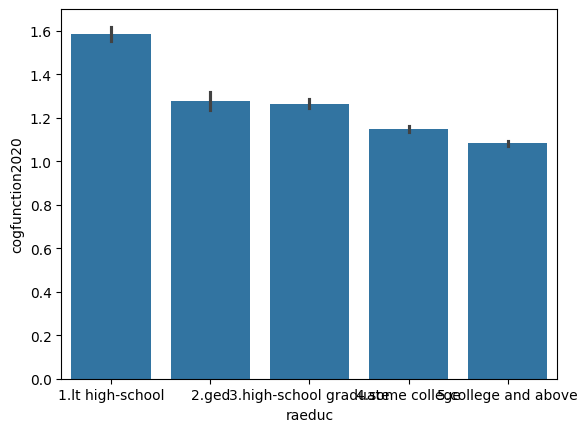

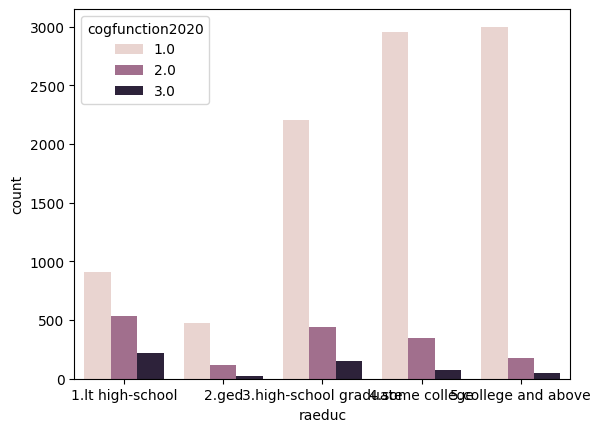

In [ ]:
# checks mean from the category of education to cognitive function
sns.barplot(x = "raeduc", y = "cogfunction2020", data = wave2020)


plt.figure()

# counts how people within this category appear within each cognitive function
sns.countplot(x = "raeduc", hue = "cogfunction2020", data = wave2020)

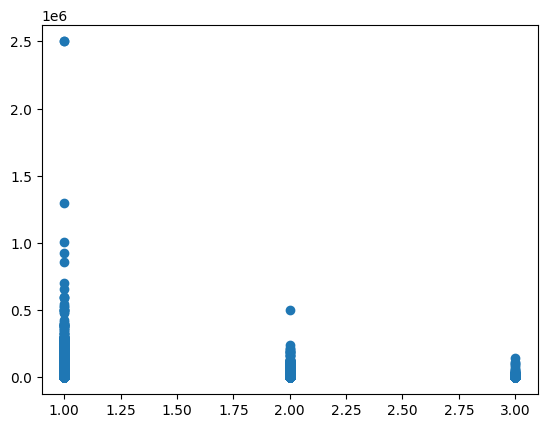

In [ ]:
plt.scatter(x = "cogfunction2020", y = "r15iearn", data = wave2020)

# FINDING CANDIDATE TO MAYBE DO A CASE STUDY?


In [ ]:
print(wave1998['hhidpn'].head())
print(wave2010['hhidpn'].head())
print(wave2020['hhidpn'].head())
print(wave2020['hhidpn'].dtype)





NameError: name 'wave1998' is not defined